In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

import warnings

# Filter warnings
warnings.filterwarnings("ignore")

In [189]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015 (1).csv')

In [190]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [192]:
# Check for null values in the entire dataset
null_values = data.isnull().sum()

# Display the count of null values for each column
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [193]:
# Check if there are any null values in the dataset
if data.isnull().values.any():
    print("\nThere are null values in the dataset.")
else:
    print("\nThere are no null values in the dataset.")


There are no null values in the dataset.


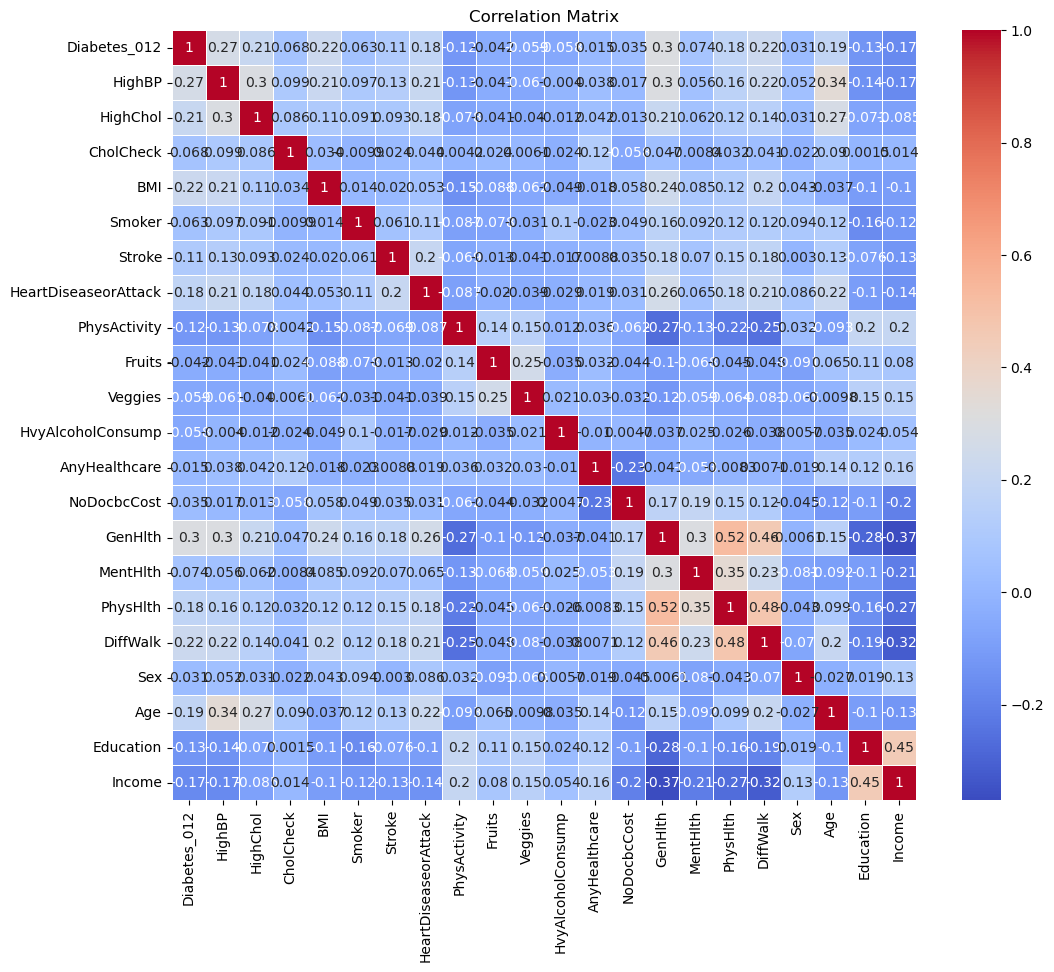

In [194]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Age Distribution')

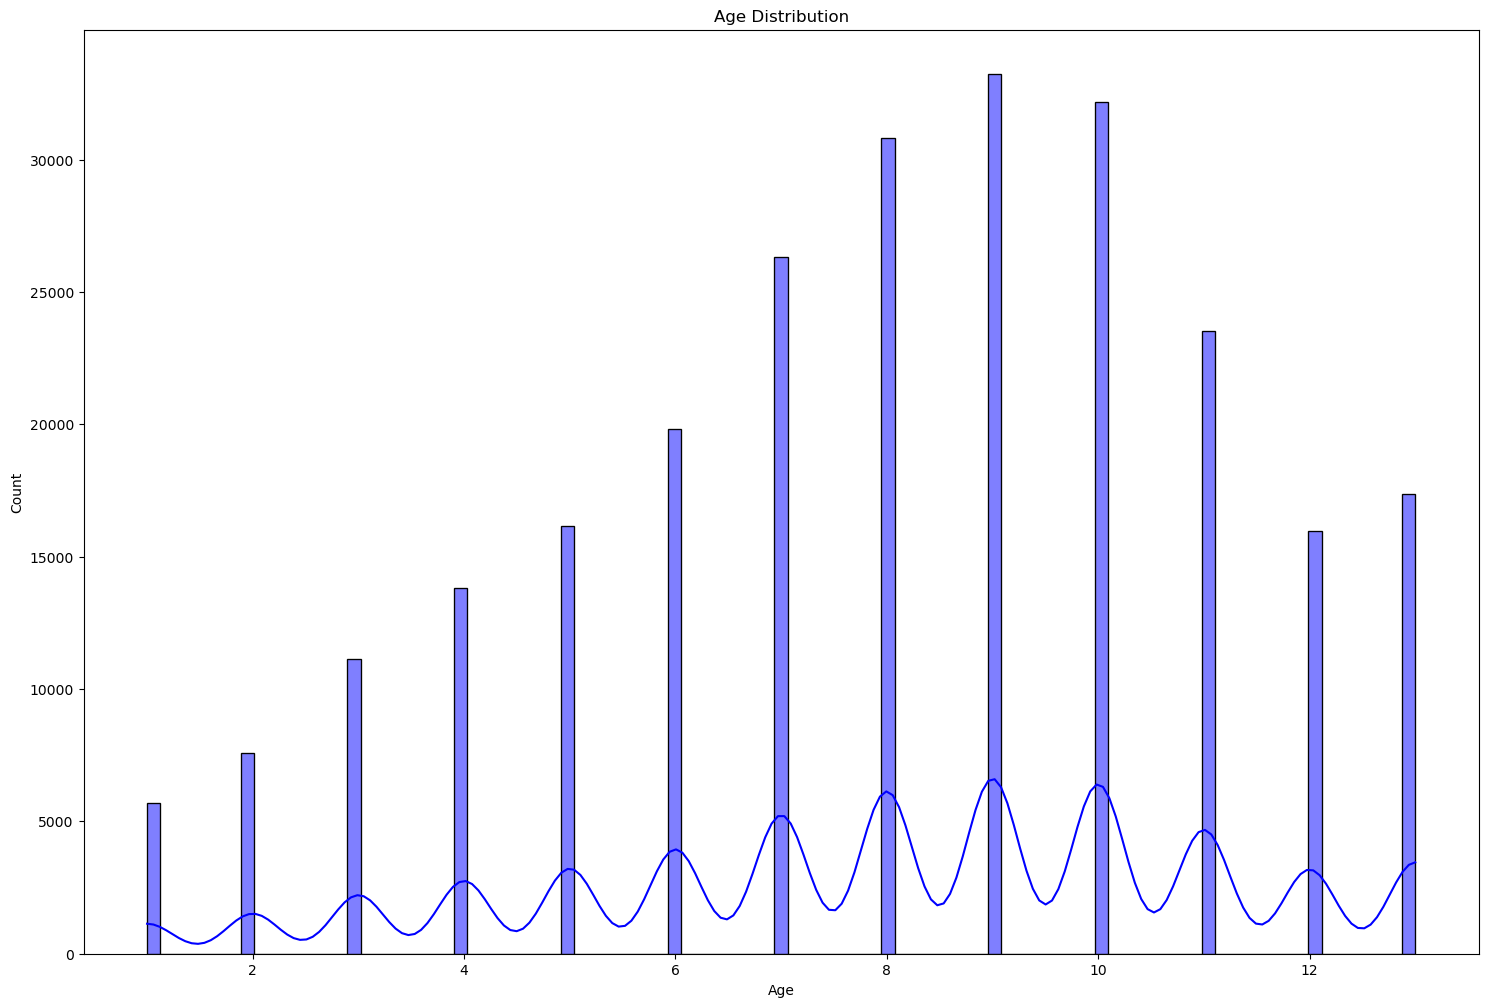

In [8]:
# Distribution of some key features
plt.figure(figsize=(18, 12))
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Diabetes Distribution')

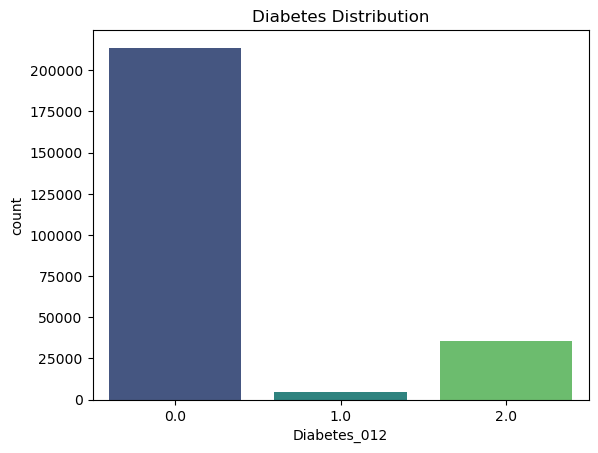

In [9]:
sns.countplot(x='Diabetes_012', data=data, palette='viridis')
plt.title('Diabetes Distribution')

Text(0.5, 1.0, 'High Blood Pressure Distribution')

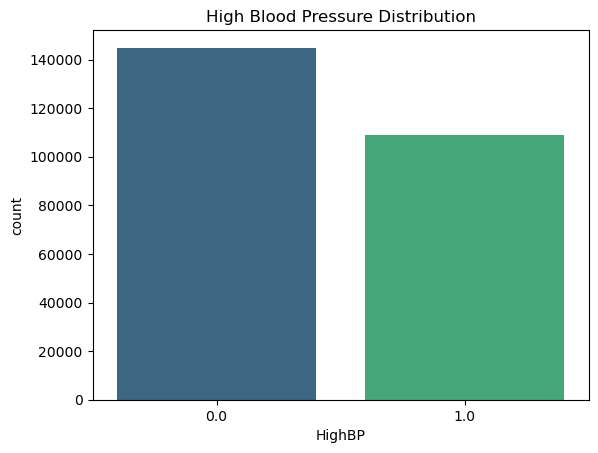

In [10]:
sns.countplot(x='HighBP', data=data, palette='viridis')
plt.title('High Blood Pressure Distribution')

Text(0.5, 1.0, 'High Cholesterol Distribution')

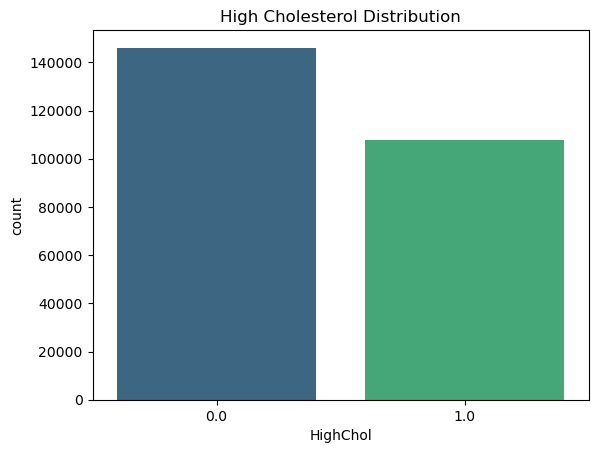

In [11]:
sns.countplot(x='HighChol', data=data, palette='viridis')
plt.title('High Cholesterol Distribution')

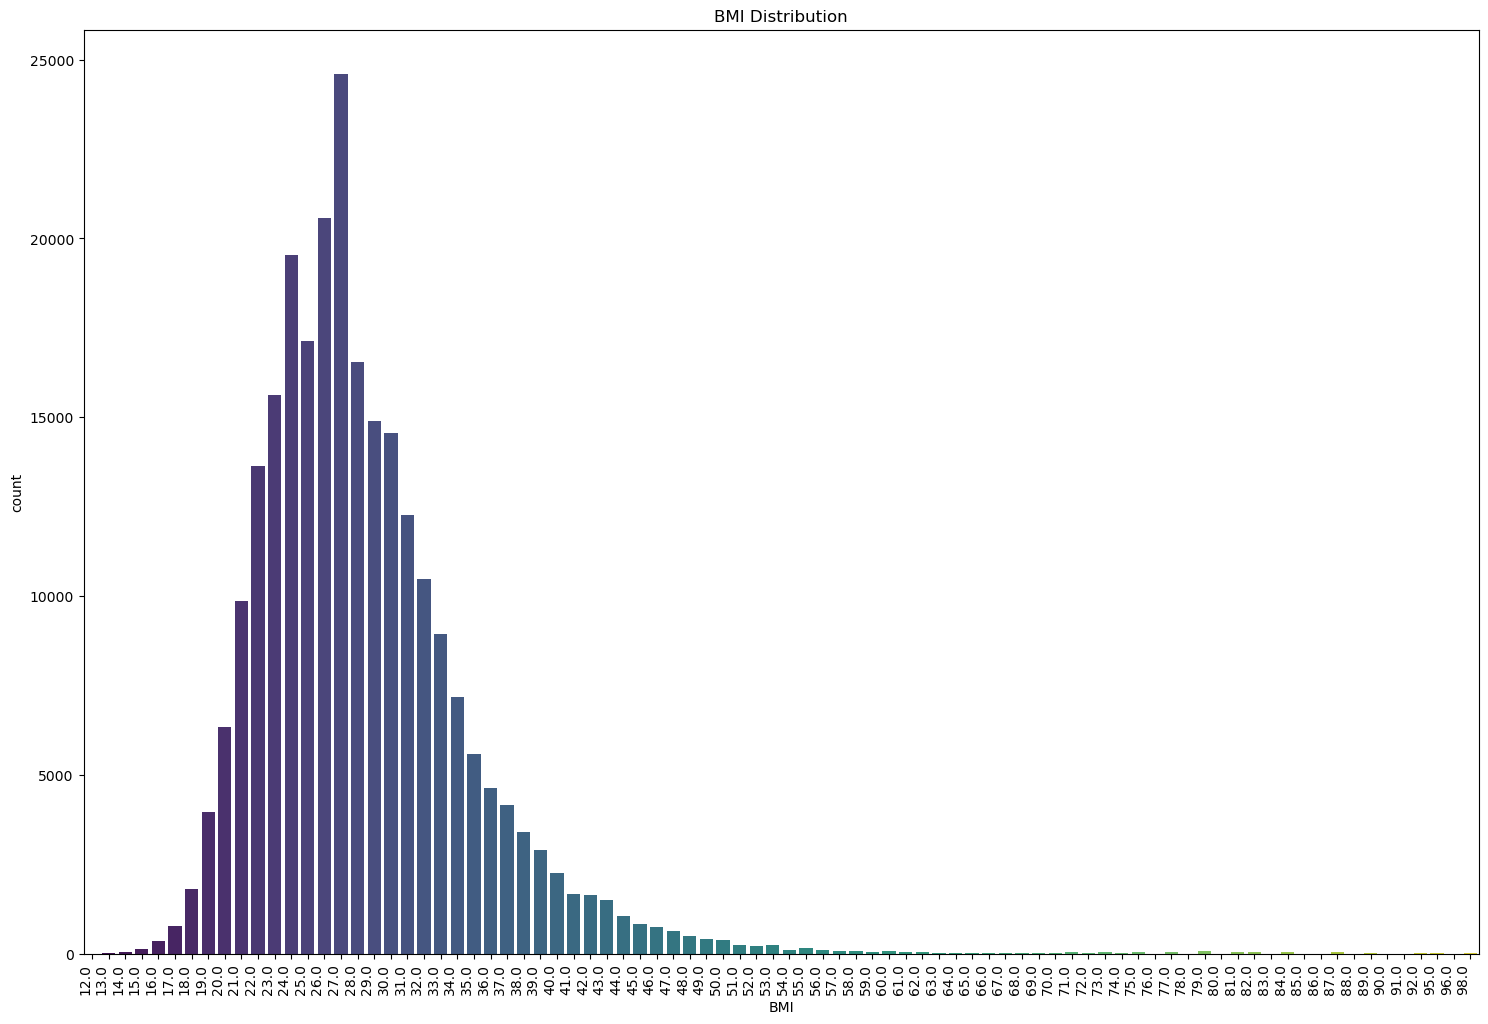

In [12]:
plt.figure(figsize=(18, 12))
sns.countplot(x='BMI', data=data, palette='viridis')
plt.title('BMI Distribution')
# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=90, ha='right')

plt.show()

Text(0.5, 1.0, 'Heart Disease or Attack Distribution')

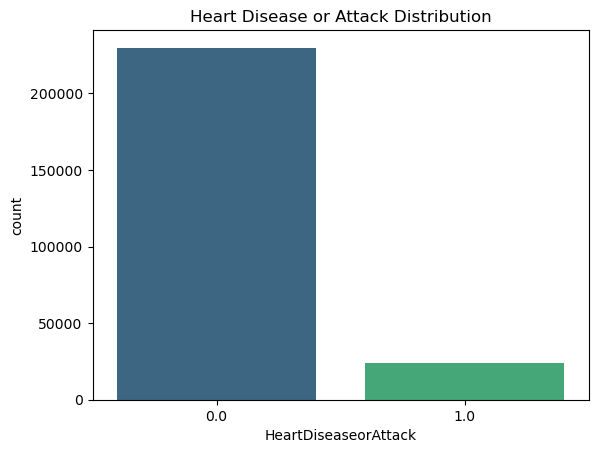

In [13]:
sns.countplot(x='HeartDiseaseorAttack', data=data, palette='viridis')
plt.title('Heart Disease or Attack Distribution')

Develop a predictive model using classification techniques like k-Nearest Neighbors (kNN), Naive Bayes, or Logistic Regression to classify individuals into three diabetes types (0 for no diabetes or only during pregnancy, 1 for prediabetes, and 2 for diabetes) 

In [195]:
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

In [196]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.12%


In [198]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736



In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have your features in X and labels in y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

# Print the results
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("Decision Tree Classification Report:")
print(report_dt)

Decision Tree Accuracy: 76.73%
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     42795
         1.0       0.04      0.05      0.04       944
         2.0       0.29      0.33      0.31      6997

    accuracy                           0.77     50736
   macro avg       0.40      0.41      0.41     50736
weighted avg       0.78      0.77      0.77     50736



In [200]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [213]:
# Initialize k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)  

# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [21]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     42795
         1.0       0.07      0.01      0.01       944
         2.0       0.36      0.24      0.29      6997

    accuracy                           0.82     50736
   macro avg       0.43      0.39      0.40     50736
weighted avg       0.78      0.82      0.80     50736



In [202]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.77


In [23]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     42795
         1.0       0.04      0.05      0.04       944
         2.0       0.29      0.33      0.31      6997

    accuracy                           0.77     50736
   macro avg       0.40      0.41      0.41     50736
weighted avg       0.78      0.77      0.77     50736



In [203]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.83%


In [25]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[41755     0  1040]
 [  871     0    73]
 [ 5714     0  1283]]


In [26]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.54      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



Create a predictive model to classify individuals as either having no diabetes (0) or having prediabetes/diabetes (1) using the balanced Diabetes_binary 50-50 split dataset.

In [82]:
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [83]:
# Select features and target variable
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [85]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [87]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[12893  4780]
 [ 4057 13616]]


In [88]:
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     17673
         1.0       0.74      0.77      0.75     17673

    accuracy                           0.75     35346
   macro avg       0.75      0.75      0.75     35346
weighted avg       0.75      0.75      0.75     35346



In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your features in X and labels in y
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

# Display results
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_tree}')
print(f'Classification Report:\n{classification_rep_tree}')

Decision Tree Accuracy: 0.65
Confusion Matrix:
[[11627  6063]
 [ 6195 11461]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65     17690
         1.0       0.65      0.65      0.65     17656

    accuracy                           0.65     35346
   macro avg       0.65      0.65      0.65     35346
weighted avg       0.65      0.65      0.65     35346



In [92]:
# Create k-Nearest Neighbors (kNN) model
knn_model = KNeighborsClassifier(n_neighbors=270)  

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.77%


In [93]:
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[12344  5346]
 [ 3927 13729]]


In [94]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     17690
         1.0       0.72      0.78      0.75     17656

    accuracy                           0.74     35346
   macro avg       0.74      0.74      0.74     35346
weighted avg       0.74      0.74      0.74     35346



Explore classification techniques such as k-Nearest Neighbors (kNN), Naive Bayes, or Logistic Regression while addressing the challenge of class imbalance in the imbalanced Diabetes_binary dataset. Techniques like oversampling, undersampling, or advanced algorithms can be applied to handle imbalanced datasets.

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [102]:
# Assuming 'data' is your DataFrame with the provided columns
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'Diabetes Distribution')

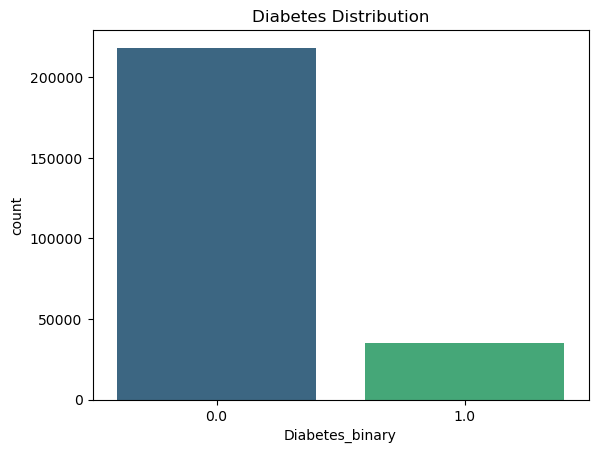

In [154]:
sns.countplot(x='Diabetes_binary', data=data, palette='viridis')
plt.title('Diabetes Distribution')

In [155]:
# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [156]:
# Create pipelines for each classification technique
knn_model = Pipeline([
    ('classifier', KNeighborsClassifier(n_neighbors=470))
])

In [157]:
nb_model = Pipeline([
    ('classifier', GaussianNB())
])

In [158]:
lr_model = Pipeline([
    ('classifier', LogisticRegression())
])

In [159]:
# Create a Decision Tree model and a pipeline
dt_model = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [160]:
# Train models on resampled data
knn_model.fit(X_train_resampled, y_train_resampled)
nb_model.fit(X_train_resampled, y_train_resampled)
lr_model.fit(X_train_resampled, y_train_resampled)
dt_model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('classifier', DecisionTreeClassifier(random_state=42))])

In [161]:
# Evaluate models on the original test set
y_pred_knn = knn_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

In [162]:
# Print classification reports and confusion matrices
print("k-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

k-Nearest Neighbors:
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     43739
         1.0       0.29      0.80      0.43      6997

    accuracy                           0.70     50736
   macro avg       0.62      0.75      0.61     50736
weighted avg       0.86      0.70      0.75     50736



In [163]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Confusion Matrix:
[[30021 13718]
 [ 1372  5625]]


In [164]:
print("\nNaive Bayes:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     43739
         1.0       0.29      0.71      0.41      6997

    accuracy                           0.72     50736
   macro avg       0.62      0.72      0.62     50736
weighted avg       0.85      0.72      0.76     50736



In [165]:
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))


Decision Tree:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43739
         1.0       0.28      0.30      0.29      6997

    accuracy                           0.79     50736
   macro avg       0.58      0.59      0.58     50736
weighted avg       0.80      0.79      0.80     50736



In [166]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Confusion Matrix:
[[31739 12000]
 [ 2045  4952]]


In [167]:
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43739
         1.0       0.31      0.78      0.44      6997

    accuracy                           0.73     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.73      0.77     50736



In [168]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
[[31644 12095]
 [ 1550  5447]]


Identify and select the most influential features in predicting diabetes outcomes from the 21 available features.

In [169]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [180]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [181]:
N = 10

# Select the top N most important features
top_features = feature_importance_df.head(N)['Feature'].tolist()

In [182]:
# Print and visualize the feature importances
print("Top Features:")
print(top_features)

Top Features:
['BMI', 'Age', 'Income', 'PhysHlth', 'GenHlth', 'Education', 'MentHlth', 'HighBP', 'Smoker', 'Fruits']


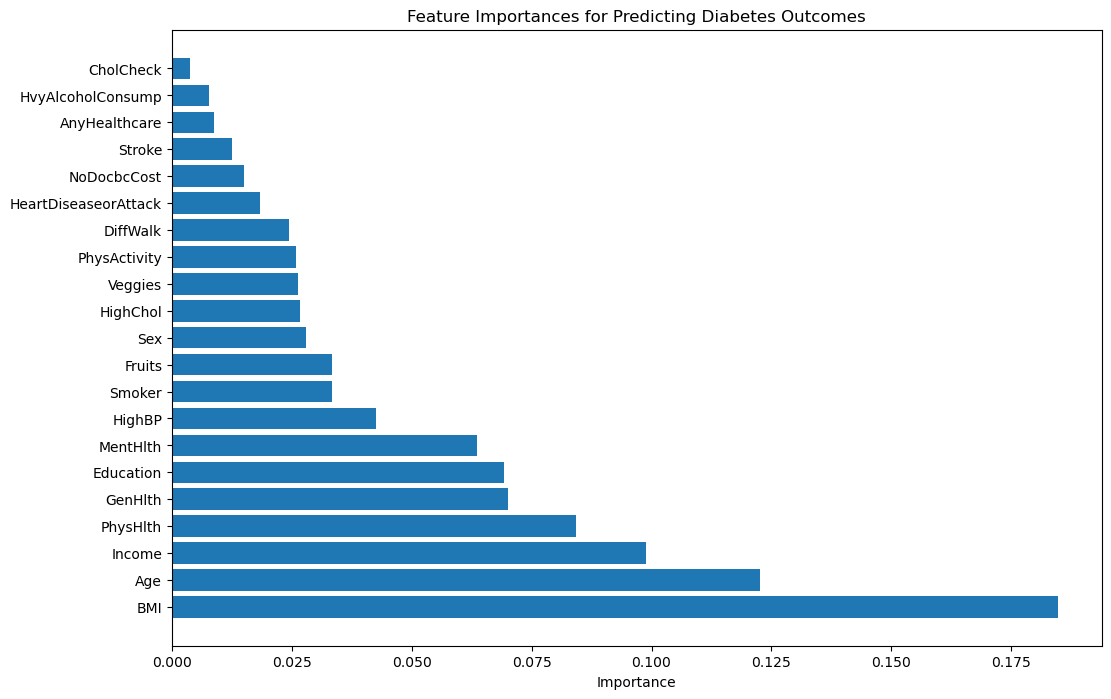

In [183]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Predicting Diabetes Outcomes')
plt.show()

Use classification techniques like Logistic Regression, which inherently provides feature importance, or employ techniques like Recursive Feature Elimination (RFE) with Decision Tree to identify and select the most influential features in predicting diabetes outcomes from the 21 available features.

In [184]:
# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data and target variable (X and y) ready
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_rfe)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8366051718700726
